In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
pd.set_option('display.max_columns', None)

In [2]:
random_state = 7
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
X = train
y = train.target
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = random_state)

271.2428593635559


,index,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
159995,53459,train_53459,0.002707,-0.001205,-0.016351,-0.003710,-0.000118,-0.003099,0.061319,0.001913,0.002121,-0.014131,0.000540,0.001705,-0.328681,-0.007220,-0.001573,-0.010509,-0.004110,-0.000492,0.005122,-0.000447,0.001263,0.006562,0.001071,-0.025659,0.001059,-0.021806,-0.008382,0.004429,-0.027356,-0.003602,0.000089,-0.016409,-0.007683,-0.001611,-0.013750,0.001203,-0.009647,0.003162,0.000637,0.000586,0.000350,0.000196,-0.017277,-0.085800,-0.004827,0.000393,0.000066,0.000513,-0.000622,0.001511,-0.027234,-0.001019,-0.001100,-0.010397,-0.000447,-0.002171,-0.006871,0.000842,-0.006427,0.002336,0.001138,-0.000018,-0.004275,0.000619,0.005301,0.001392,-0.020417,-0.005332,1.273484,-0.001067,-0.000593,-0.114379,0.001203,0.000267,0.000426,-0.005632,-0.006536,0.000041,-0.003704,-0.002075,-0.005778,-0.031317,0.001770,-0.002578,0.000326,0.004925,-0.003655,0.000706,0.004382,-0.007010,0.000152,-0.098512,0.000132,-0.068847,0.000542,-0.010815,-0.000067,-0.001058,-0.008007,0.010281,0.000233,0.002032,-0.000253,0.004896,0.013989,-0.030350,-0.007297,0.002961,0.066900,0.000681,0.013560,0.000119,-0.013094,-0.000327,-0.020659,-0.015826,0.004084,-0.000665,-0.005305,-0.003619,0.001003,-0.002191,-0.004369,-0.004922,-0.000125,0.018380,0.004684,-0.013873,-0.007143,0.002122,-0.012093,-0.002709,-0.015889,-0.021784,0.000656,-0.002198,-0.000217,0.001400,-0.002110,-0.008062,-0.001591,-0.000756,-0.001736,-0.002052,-0.031253,-0.001510,-0.013400,-0.000129,-0.066056,-0.002781,0.001413,0.001811,0.002134,0.001797,-0.009715,-0.001952,0.001456,-0.005110,-0.000267,-0.001481,-0.001144,0.017354,-0.017754,0.002418,-0.001520,-0.006644,-0.131787,-0.002818,0.004708,0.018671,-0.001832,-0.002575,-0.003556,-0.001406,-0.004178,-0.005055,0.000876,-0.014442,-0.002012,-0.008617,0.001152,0.012292,0.000851,0.000175,0.001734,0.000543,0.002550,-0.000842,-0.004593,-0.002204,-0.004601,-0.000563,0.018075,-0.001816,0.002005,0.014689,-0.001751,-0.016955,-0.001915,-0.000774
159996,10742,train_10742,-0.012169,-0.011543,-0.000333,0.006457,-0.003049,-0.002533,0.018076,0.001523,0.000758,-0.042219,0.000005,-0.003913,-0.030327,0.007741,0.001261,0.013575,-0.000320,0.000353,-0.000177,-0.001793,-0.003089,-0.003432,0.005062,-0.026143,0.005186,-0.022454,-0.004274,0.003933,-0.027401,-0.001479,0.000436,-0.002345,-0.002797,0.007536,0.030850,0.000065,-0.012954,-0.002177,-0.003759,0.001072,0.000043,-0.000856,-0.007933,0.072236,-0.005055,0.001213,0.000921,-0.000066,0.002257,-0.000881,-0.027499,-0.001570,-0.004436,-0.002586,-0.000

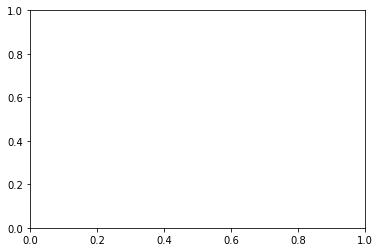

In [4]:
# calculate train_X
start = time.time()

# dataframe of divergence/convergence var
dc = pd.DataFrame(train_X['ID_code']).reset_index()

for i, var in enumerate(train.drop(['ID_code', 'target'], axis = 1).columns):
    # divergence/convergence var
    dc_var = np.zeros(len(train_X))
    
    # get kde plot array of x and y
    kde_1 = sns.kdeplot(train_X[var][train_X.target == 1])
    kde_x_1, kde_y_1 = kde_1.lines[0].get_data()
    plt.cla()

    kde_0 = sns.kdeplot(train_X[var][train_X.target == 0])
    kde_x_0, kde_y_0 = kde_0.lines[0].get_data()
    plt.cla()

    for i, x_value in enumerate(train_X[var]):
        # interpolated y-value of kde for var with target = 1
        kde_yi_1 = np.interp(x_value, kde_x_1, kde_y_1)

        # interpolated y-value of kde for var with target = 0
        kde_yi_0 = np.interp(x_value, kde_x_0, kde_y_0)

        # new proxy var (kde divergence/convergence)
        dc_var[i] = kde_yi_1 - kde_yi_0

    # add dc var to train df
    dc_var = pd.DataFrame({var: dc_var})
    dc = pd.merge(dc, 
                  dc_var, 
                  left_on = dc.index, 
                  right_on = dc_var.index, 
                  suffixes = ['', '_dc']).drop(['key_0'], axis = 1)

end = time.time()
print(end - start)
dc.tail()

In [5]:
start = time.time()

dc_train_X = pd.merge(train_X, 
                      dc,
                      right_on = 'ID_code',
                      left_on = 'ID_code',
                      suffixes = ['', '_dc'])

end = time.time()
print(end - start)
dc_train_X.tail()

# to drop: 'index', 'target', 'ID_code'

0.8786253929138184


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,index,var_0_dc,var_1_dc,var_2_dc,var_3_dc,var_4_dc,var_5_dc,var_6_dc,var_7_dc,var_8_dc,var_9_dc,var_10_dc,var_11_dc,var_12_dc,var_13_dc,var_14_dc,var_15_dc,var_16_dc,var_17_dc,var_18_dc,var_19_dc,var_20_dc,var_21_dc,var_22_dc,var_23_dc,var_24_dc,var_25_dc,var_26_dc,var_27_dc,var_28_dc,var_29_dc,var_30_dc,var_31_dc,var_32_dc,var_33_dc,var_34_dc,var_35_dc,var_36_dc,var_37_dc,var_38_dc,var_39_dc,var_40_dc,var_41_dc,var_42_dc,var_43_dc,var_44_dc,var_45_dc,var_46_dc,var_47_dc,var_48_dc,var_49_dc,var_50_dc,var_51_dc,var_52_dc,var_53_dc,var_54_dc,var_55_dc,var_56_dc,var_57_dc,var_58_dc,var_59_dc,var_60_dc,var_61_dc,var_62_dc,var_63_dc,var_64_dc,var_65_dc,var_66_dc,var_67_dc,var_68_dc,var_69_dc,var_70_dc,var_71_dc,var_72_dc,var_73_dc,var_74_dc,var_75_dc,var_76_dc,var_77_dc,var_78_dc,var_79_dc,var_80_dc,var_81_dc,var_82_dc,var_83_dc,var_84_dc,var_85_dc,var_86_dc,var_87_dc,var_88_dc,var_89_dc,var_90_dc,var_91_dc,var_92_dc,var_93_dc,var_94_dc,var_95_dc,var_96_dc,var_97_dc,var_98_dc,var_99_dc,var_100_dc,var_101_dc,var_102_dc,var_103_dc,var_104_dc,var_105_dc,var_106_dc,var_107_dc,var_108_dc,var_109_dc,var_110_dc,var_111_dc,var_112_dc,var_113_dc,var_114_dc,var_115_dc,var_116_dc,var_117_dc,var_118_dc,var_119_dc,var_120_dc,var_121_dc,var_122_dc,var_123_dc,var_124_dc,var_125_dc,var_126_dc,var_127_dc,var_128_dc,var_129_dc,var_130_dc,var_131_dc,var_132_dc,var_133_dc,var_134_dc,var_135_dc,var_136_dc,var_137_dc,var_138_dc,var_139_dc,var_140_dc,var_141_dc,var_142_dc,var_143_dc,var_144_dc,var_145_dc,var_146_dc,var_147_dc,var_148_dc,var_149_dc,var_150_dc,var_151_dc,var_152_dc,var_153_dc,var_154_dc,var_155_dc,var_156_dc,var_157_dc,var_158_dc,var_159_dc,var_160_dc,var_161_dc,var_162_dc,var_163_dc,var_164_dc,var_165_dc,var_166_dc,var_167_dc,var_168_dc,var_169_dc,var_170_dc,var_171_dc,var_172_dc,var_173_dc,var_174_dc,var_175_dc,var_176_dc,var_177_dc,var_178_dc,var_179_dc,var_180_dc,var_181_dc,var_182_dc,var_183_dc,var_184_dc,var_185_dc,var_186_dc,var_187_dc,var_188_dc,var_189_dc,var_190_dc,var_191_dc,var_192_dc,var_193_dc,var_194_dc,var_195_dc,var_196_dc,var_197_dc,var_198_dc,var_199_dc
159995,train_53459,0,12.6016,-10.4240,8.1915,5.7837,12.5771,-15.3366,6.9890,17.0404,-0.4261,8.1225,-3.8353,2.5078,14.0755,15.4050,6.3004,14.4578,10.4902,4.1215,31.6937,17.6811,6.4558,3.7060,5.6478,3.8007,13.6433,13.7201,-6.4009,1.3480,6.4009,4.9381,-6.3614,12.1773,-2.1701,11.0923,12.5719,6.7988,2.9858,5.8296,12.4632,8.2656,0.8052,9.9515,12.0210,11.7748,13.7889,-59.2289,12.5520,-10.6021,10.9028,1

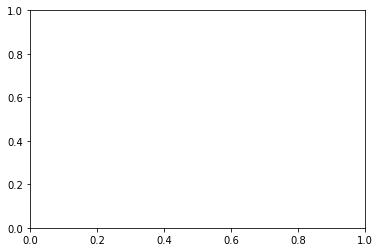

In [6]:
# Calculate val_X

# dataframe of divergence/convergence var
dc = pd.DataFrame(val_X['ID_code']).reset_index()

for i, var in enumerate(train.drop(['ID_code', 'target'], axis = 1).columns):
    # divergence/convergence var
    dc_var = np.zeros(len(val_X))
    
    # get kde plot array of x and y
    kde_1 = sns.kdeplot(train_X[var][train_X.target == 1])
    kde_x_1, kde_y_1 = kde_1.lines[0].get_data()
    plt.cla()

    kde_0 = sns.kdeplot(train_X[var][train_X.target == 0])
    kde_x_0, kde_y_0 = kde_0.lines[0].get_data()
    plt.cla()

    for i, x_value in enumerate(val_X[var]):
        # interpolated y-value of kde for var with target = 1
        kde_yi_1 = np.interp(x_value, kde_x_1, kde_y_1)

        # interpolated y-value of kde for var with target = 0
        kde_yi_0 = np.interp(x_value, kde_x_0, kde_y_0)

        # new proxy var (kde divergence/convergence)
        dc_var[i] = kde_yi_1 - kde_yi_0

    # add dc var to train df
    dc_var = pd.DataFrame({var: dc_var})
    dc = pd.merge(dc, 
                  dc_var, 
                  left_on = dc.index, 
                  right_on = dc_var.index, 
                  suffixes = ['', '_dc']).drop(['key_0'], axis = 1)

dc_val_X = pd.merge(val_X, 
                    dc,
                    right_on = 'ID_code',
                    left_on = 'ID_code',
                    suffixes = ['', '_dc'])

In [7]:
dc_val_X.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,index,var_0_dc,var_1_dc,var_2_dc,var_3_dc,var_4_dc,var_5_dc,var_6_dc,var_7_dc,var_8_dc,var_9_dc,var_10_dc,var_11_dc,var_12_dc,var_13_dc,var_14_dc,var_15_dc,var_16_dc,var_17_dc,var_18_dc,var_19_dc,var_20_dc,var_21_dc,var_22_dc,var_23_dc,var_24_dc,var_25_dc,var_26_dc,var_27_dc,var_28_dc,var_29_dc,var_30_dc,var_31_dc,var_32_dc,var_33_dc,var_34_dc,var_35_dc,var_36_dc,var_37_dc,var_38_dc,var_39_dc,var_40_dc,var_41_dc,var_42_dc,var_43_dc,var_44_dc,var_45_dc,var_46_dc,var_47_dc,var_48_dc,var_49_dc,var_50_dc,var_51_dc,var_52_dc,var_53_dc,var_54_dc,var_55_dc,var_56_dc,var_57_dc,var_58_dc,var_59_dc,var_60_dc,var_61_dc,var_62_dc,var_63_dc,var_64_dc,var_65_dc,var_66_dc,var_67_dc,var_68_dc,var_69_dc,var_70_dc,var_71_dc,var_72_dc,var_73_dc,var_74_dc,var_75_dc,var_76_dc,var_77_dc,var_78_dc,var_79_dc,var_80_dc,var_81_dc,var_82_dc,var_83_dc,var_84_dc,var_85_dc,var_86_dc,var_87_dc,var_88_dc,var_89_dc,var_90_dc,var_91_dc,var_92_dc,var_93_dc,var_94_dc,var_95_dc,var_96_dc,var_97_dc,var_98_dc,var_99_dc,var_100_dc,var_101_dc,var_102_dc,var_103_dc,var_104_dc,var_105_dc,var_106_dc,var_107_dc,var_108_dc,var_109_dc,var_110_dc,var_111_dc,var_112_dc,var_113_dc,var_114_dc,var_115_dc,var_116_dc,var_117_dc,var_118_dc,var_119_dc,var_120_dc,var_121_dc,var_122_dc,var_123_dc,var_124_dc,var_125_dc,var_126_dc,var_127_dc,var_128_dc,var_129_dc,var_130_dc,var_131_dc,var_132_dc,var_133_dc,var_134_dc,var_135_dc,var_136_dc,var_137_dc,var_138_dc,var_139_dc,var_140_dc,var_141_dc,var_142_dc,var_143_dc,var_144_dc,var_145_dc,var_146_dc,var_147_dc,var_148_dc,var_149_dc,var_150_dc,var_151_dc,var_152_dc,var_153_dc,var_154_dc,var_155_dc,var_156_dc,var_157_dc,var_158_dc,var_159_dc,var_160_dc,var_161_dc,var_162_dc,var_163_dc,var_164_dc,var_165_dc,var_166_dc,var_167_dc,var_168_dc,var_169_dc,var_170_dc,var_171_dc,var_172_dc,var_173_dc,var_174_dc,var_175_dc,var_176_dc,var_177_dc,var_178_dc,var_179_dc,var_180_dc,var_181_dc,var_182_dc,var_183_dc,var_184_dc,var_185_dc,var_186_dc,var_187_dc,var_188_dc,var_189_dc,var_190_dc,var_191_dc,var_192_dc,var_193_dc,var_194_dc,var_195_dc,var_196_dc,var_197_dc,var_198_dc,var_199_dc
0,train_190687,0,10.8204,0.6761,12.2625,3.7849,11.3784,9.3665,6.7848,14.1152,2.3335,8.2889,5.5019,-8.7728,14.2636,8.0338,4.3405,14.9309,4.2452,-7.8872,23.0381,19.8604,19.5171,31.7816,2.9581,3.1105,2.9542,13.2222,0.9227,-3.3661,5.4299,-0.0611,-15.3876,9.1724,0.6192,10.4763,10.5889,3.9824,2.2225,3.5163,6.2886,-6.5622,-7.7012,7.7547,12.0943,12.0658,21.6691,-4.2813,10.8162,-13.2976,0.0188,18.8636,11

In [8]:
param = {
    "objective": "binary",
    "metric": "auc",
    "boosting": 'gbdt',
    "max_depth": -1,
    "num_leaves": 50,
    "learning_rate": 0.01,
    "bagging_freq": 5,
    "bagging_fraction": 0.4,
    "feature_fraction": 0.05,
    "min_data_in_leaf": 80,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
    #"lambda_l1": 5,
    #"lambda_l2": 5,
    "bagging_seed": random_state,
    "verbosity": 1,
    "seed": random_state
}

In [9]:
start = time.time()

auc_result = pd.DataFrame(columns = ['param', 'iteration', 'auc'])
evals_result = {}
train_data = lgb.Dataset(dc_train_X.drop(['ID_code', 'index', 'target'], axis = 1), train_y)
val_data = lgb.Dataset(dc_val_X.drop(['ID_code', 'index', 'target'], axis = 1), val_y)

for n in [100]: # iteration
    for i in range(8, 52): # param
        param['num_leaves'] = i
        
        #for j in range(40, 201, 10): # param
            #param['min_data_in_leaf'] = j
            
        for k in np.arange(0.001, 0.05, 0.001): # param
            param['learning_rate'] = k
                
            #for i in np.arange(0.05, 1, 0.05): # param
                #param['bagging_fraction'] = i
            #for i in np.arange(0.01, 0.52, 0.02): # param
                #param['feature_fraction'] = i
            lgb.train(param, 
                train_data, 
                n, 
                valid_sets = [train_data, val_data],
                verbose_eval = 0,
                evals_result = evals_result)
            last_auc_of_iteration = evals_result['valid_1']['auc'][-1]
            auc_for_iteration = pd.DataFrame([[i, k, str(n), last_auc_of_iteration]], 
                                                columns = ['param_i', 'param_k', 'iteration', 'auc'])
            auc_result = auc_result.append(auc_for_iteration, ignore_index = True)

end = time.time()

In [10]:
print(end - start)

7302.853804826736


In [11]:
print(auc_result)

           auc iteration param  param_i  param_k
0     0.819818       100   NaN      8.0    0.001
1     0.819786       100   NaN      8.0    0.002
2     0.820120       100   NaN      8.0    0.003
3     0.820252       100   NaN      8.0    0.004
4     0.820415       100   NaN      8.0    0.005
5     0.820670       100   NaN      8.0    0.006
6     0.821042       100   NaN      8.0    0.007
7     0.821125       100   NaN      8.0    0.008
8     0.821176       100   NaN      8.0    0.009
9     0.821410       100   NaN      8.0    0.010
10    0.821670       100   NaN      8.0    0.011
11    0.822068       100   NaN      8.0    0.012
12    0.822666       100   NaN      8.0    0.013
13    0.822847       100   NaN      8.0    0.014
14    0.823663       100   NaN      8.0    0.015
15    0.823993       100   NaN      8.0    0.016
16    0.824137       100   NaN      8.0    0.017
17    0.823905       100   NaN      8.0    0.018
18    0.824527       100   NaN      8.0    0.019
19    0.824867      

In [12]:
auc_result.to_csv('auc_result.csv')

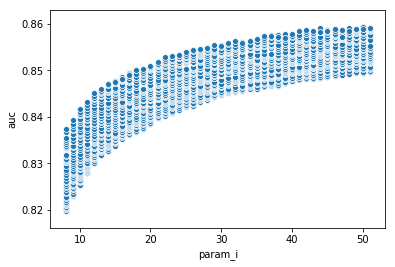

In [13]:
sns.scatterplot(x = 'param_i', y = 'auc', data = auc_result)

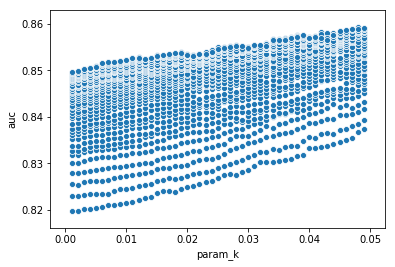

In [14]:
sns.scatterplot(x = 'param_k', y = 'auc', data = auc_result)